In [1]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole

In [14]:
m = Chem.MolFromSmiles("C(=O)c1ccccc1")
# almost same molecule
m1 = Chem.MolFromSmiles("c1ccccc1C(=O)")
# completely different molecule
cdm = Chem.MolFromSmiles("c1ccccc1C(=O)CCC1CC1")

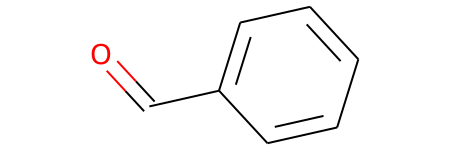

In [15]:
m

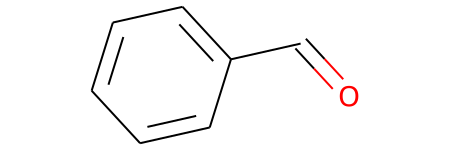

In [16]:
m1

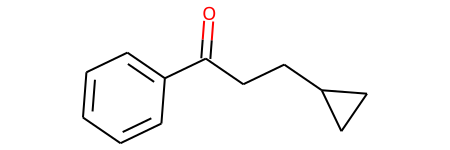

In [17]:
cdm

In [18]:
# compare
print(Chem.MolToSmiles(m), Chem.MolToSmiles(m1))
print(Chem.MolToSmiles(m, canonical=False), Chem.MolToSmiles(m1, canonical=False))

O=Cc1ccccc1 O=Cc1ccccc1
C(=O)c1ccccc1 c1ccccc1C=O


In [19]:
print(Chem.MolToMolBlock(m))


     RDKit          2D

  8  8  0  0  0  0  0  0  0  0999 V2000
    3.0000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.7500   -1.2990    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    1.5000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.7500   -1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.7500   -1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.5000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.7500    1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.7500    1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  2  0
  1  3  1  0
  3  4  2  0
  4  5  1  0
  5  6  2  0
  6  7  1  0
  7  8  2  0
  8  3  1  0
M  END



In [20]:
# How to calculate all rings in drug bank?
ri=m.GetRingInfo()
ri.AtomRings()

((2, 7, 6, 5, 4, 3),)

In [22]:
ri=m1.GetRingInfo()
ri.AtomRings()

((0, 5, 4, 3, 2, 1),)

In [23]:
# SSSR = smallest set of smallest rings
Chem.GetSSSR(m), Chem.GetSSSR(m1), Chem.GetSSSR(cdm)

(1, 1, 2)

In [24]:
suppl = Chem.SDMolSupplier('../data/drugbank.sdf')  # Default working directory is where the notebook is
drugs = [m for m in suppl if not m == None]  # supplier sometimes returns None, you can see many errors below

RDKit ERROR: [17:49:11] Explicit valence for atom # 7 N, 4, is greater than permitted
RDKit ERROR: [17:49:11] ERROR: Could not sanitize molecule ending on line 20009
RDKit ERROR: [17:49:11] ERROR: Explicit valence for atom # 7 N, 4, is greater than permitted
RDKit ERROR: [17:49:12] Can't kekulize mol.  Unkekulized atoms: 1 2 3 5 6 7 8 9 10
RDKit ERROR: 
RDKit ERROR: [17:49:12] ERROR: Could not sanitize molecule ending on line 250947
RDKit ERROR: [17:49:12] ERROR: Can't kekulize mol.  Unkekulized atoms: 1 2 3 5 6 7 8 9 10
RDKit ERROR: 
RDKit ERROR: [17:49:12] Explicit valence for atom # 17 O, 3, is greater than permitted
RDKit ERROR: [17:49:12] ERROR: Could not sanitize molecule ending on line 258130
RDKit ERROR: [17:49:12] ERROR: Explicit valence for atom # 17 O, 3, is greater than permitted
RDKit ERROR: [17:49:12] Can't kekulize mol.  Unkekulized atoms: 57 58 59 60 61 62 63 64 65
RDKit ERROR: 
RDKit ERROR: [17:49:12] ERROR: Could not sanitize molecule ending on line 261581
RDKit ERROR

In [26]:
len(drugs)

7115

In [27]:
# With SSSR algorithm, we can calculate all rings
rings = [Chem.GetSSSR(drug) for drug in drugs]
rings[:10]

[6, 6, 4, 6, 1, 4, 5, 1, 12, 3]

In [28]:
[(m,r) for m, r in zip(drugs, rings[:10])]

[(<rdkit.Chem.rdchem.Mol at 0x7f331c103df0>, 6),
 (<rdkit.Chem.rdchem.Mol at 0x7f331c103e40>, 6),
 (<rdkit.Chem.rdchem.Mol at 0x7f331c103e90>, 4),
 (<rdkit.Chem.rdchem.Mol at 0x7f331c103ee0>, 6),
 (<rdkit.Chem.rdchem.Mol at 0x7f331c103f30>, 1),
 (<rdkit.Chem.rdchem.Mol at 0x7f331c103f80>, 4),
 (<rdkit.Chem.rdchem.Mol at 0x7f331c106030>, 5),
 (<rdkit.Chem.rdchem.Mol at 0x7f331c106080>, 1),
 (<rdkit.Chem.rdchem.Mol at 0x7f331c1060d0>, 12),
 (<rdkit.Chem.rdchem.Mol at 0x7f331c106120>, 3)]

In [29]:
sum(rings)

17565

In [30]:
sum(rings)/len(drugs)

2.4687280393534787